# **Seed classification**



This section describes the dataset, downloads it, extracts images from it and finally splits it further into training and validation sets

### Dataset Description

The dataset contains images of three classes of local objects namely :

  Jehlum
  
  Sr-1
  
  mushkibudji
  
  Sr-2

  Sr-4
  
  The dataset has ** 4900  images** in total and is split into :
* Train and test splits
* Train set contains 4810 images 

* Test set contains 90 images

### Download Dataset

The dataset is stored in google drive as a zip file.

In [6]:
dataset_link = 'https://drive.google.com/open?id=1pqHH0jn6UHrUvMbwtS1cDAw6dqmAHS6A'
dataset_drive_id = '1pqHH0jn6UHrUvMbwtS1cDAw6dqmAHS6A'
download_path = 'kashir-seeds5.zip'

# download and save dataset
!wget --load-cookies /tmp/cookies.txt \
"https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
"https://drive.google.com/uc?export=download&id=$dataset_drive_id" -O- | \
sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$dataset_drive_id" \
-O $download_path && rm -rf /tmp/cookies.txt
    
!ls .

--2018-08-02 19:04:15--  https://drive.google.com/uc?export=download&confirm=A&id=1pqHH0jn6UHrUvMbwtS1cDAw6dqmAHS6A
Resolving drive.google.com (drive.google.com)... 173.194.196.138, 173.194.196.113, 173.194.196.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.196.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘kashir-seeds5.zip’

kashir-seeds5.zip       [ <=>                ]   3.11K  --.-KB/s    in 0s      

2018-08-02 19:04:15 (36.4 MB/s) - ‘kashir-seeds5.zip’ saved [3184]

datalab  kashir-seeds5.zip


### Extract Images

The dataset is in .zip package, it is extracted.

In [18]:
import os
import zipfile
zip_ref = zipfile.ZipFile(download_path, 'r')
extract_dir = './Data'
zip_ref.extractall(extract_dir)
extracted = zip_ref.namelist()
dataset_dir = os.path.join(extract_dir, extracted[0])
zip_ref.close()
!ls $dataset_dir

test  train


### Split Training Data into Training and Training-Validation Sets

The training portion of the data is further split for actual training and training validation.

* The train-validation ratio is 80:20
* Total Training Images = 100
* Images used for actual training = 80
* Images used for training validation = 20

#### Split Function

In [0]:
import random
import shutil
# This function splits the image data into train and validation sets
def train_validation_split(dataset_path, output_path, split_ratio, seed=120):
    """Builds the train and validation image sets for all image categories given a split ratio"""
    img_categories = os.listdir(dataset_path)  # all the image categories
    if os.path.exists(output_path):
        print('Dataset already exists at the given path')
    else:
        os.makedirs(output_path)
        os.mkdir(output_path + '/train')
        os.mkdir(output_path + '/validation')

        # for every image category in the dataset build train and val folders with images in them a/c to split_ratio
        print('Splitting dataset into train and validation sets: ')
        for img_category in img_categories:
            print('.', end='')
            # list all the images for this category
            imgs = os.listdir(dataset_path + '/' + img_category)
            # sort and shuffle images randomly
            imgs.sort()
            random.seed(seed)
            random.shuffle(imgs)
            # split the imgs into two halves train and test
            train_split = imgs[:int(split_ratio * len(imgs))]
            test_split = imgs[int(split_ratio * len(imgs)):]

            # built the train set and copy images
            if not os.path.exists(os.path.join(output_path, 'train', img_category)):
                os.mkdir(os.path.join(output_path, 'train', img_category))
            for img in train_split:
                source = os.path.join(dataset_path, img_category, img)
                dest = os.path.join(output_path, 'train', img_category, img)
                shutil.copy(source, dest)

            # built the test set and copy images
            if not os.path.exists(os.path.join(output_path, 'validation', img_category)):
                os.mkdir(os.path.join(output_path, 'validation', img_category))
            for img in test_split:
                source = os.path.join(dataset_path, img_category, img)
                dest = os.path.join(output_path, 'validation', img_category, img)
                shutil.copy(source, dest)
        print('\nSuccess!!')

#### Do Split 

In [20]:
# Split the training portion into two splits:
 ## 80% for actual training
 ## 20% for validation
t_dir = os.path.join(dataset_dir, 'train')
output_path = os.path.join(extract_dir, 'items_train_val_set') # post split path
train_validation_split(t_dir, output_path, 0.8)
train_dir = os.path.join(output_path, 'train')
validation_dir = os.path.join(output_path, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

Dataset already exists at the given path


#### Analyze Data Post Split

In [21]:
train_img_categories = os.listdir(train_dir)
validation_img_categories = os.listdir(validation_dir)
test_img_categories = os.listdir(test_dir)

ls_data = !ls Data/kash_items_final
ls_trainval = !ls Data/items_train_val_set
print('Data directory : %s' % ls_data)
print('Train Validation directory : %s' % ls_trainval)

no_of_classes = len(train_img_categories)
print('No of categories/classes: %d\n' % no_of_classes)

print('Object categories in the training set: %d' % len(train_img_categories), end=' ')
print(train_img_categories)
# No of images for each category in the training set
total_train_imgs = 0
for img_cat in train_img_categories:
    path = os.path.join(train_dir, img_cat)
    total_train_imgs += len(os.listdir(path))
    print('No of images for %s = %d' % (img_cat, len(os.listdir(path))))
print('Total no of images in training set = %d\n' % total_train_imgs )

print('Object categories in the validation set: %d' % len(validation_img_categories), end=' ')
print(validation_img_categories)
# No of images for each category in the validation set
total_val_imgs = 0
for img_cat in validation_img_categories:
    path = os.path.join(validation_dir, img_cat)
    total_val_imgs += len(os.listdir(path))
    print('No of images for %s = %d' % (img_cat, len(os.listdir(path))))
print('Total no of images in validation set = %d\n' % total_val_imgs )

print('Object categories in the test set: %d' % len(test_img_categories), end=' ')
print(test_img_categories)
# No of images for each category in the test set
total_test_imgs = 0
for img_cat in test_img_categories:
    path = os.path.join(test_dir, img_cat)
    total_test_imgs += len(os.listdir(path))
    print('No of images for %s = %d' % (img_cat, len(os.listdir(path))))
print('Total no of images in test set = %d' % total_test_imgs )

Data directory : ["ls: cannot access 'Data/kash_items_final': No such file or directory"]
Train Validation directory : ['train', 'validation']
No of categories/classes: 5

Object categories in the training set: 5 ['mushkbudji', 'sr-2', 'sr-1', 'sr-4', 'jehlum']
No of images for mushkbudji = 760
No of images for sr-2 = 760
No of images for sr-1 = 760
No of images for sr-4 = 760
No of images for jehlum = 760
Total no of images in training set = 3800

Object categories in the validation set: 5 ['mushkbudji', 'sr-2', 'sr-1', 'sr-4', 'jehlum']
No of images for mushkbudji = 190
No of images for sr-2 = 190
No of images for sr-1 = 190
No of images for sr-4 = 190
No of images for jehlum = 190
Total no of images in validation set = 950

Object categories in the test set: 5 ['mushkbudji', 'sr-2', 'sr-1', 'sr-4', 'jehlum']
No of images for mushkbudji = 30
No of images for sr-2 = 30
No of images for sr-1 = 30
No of images for sr-4 = 30
No of images for jehlum = 30
Total no of images in test set = 1

### Visualize Random Images

Some random images are shown from all three sets.

Actual Training, Training Validation and Test set.

ValueError: ignored

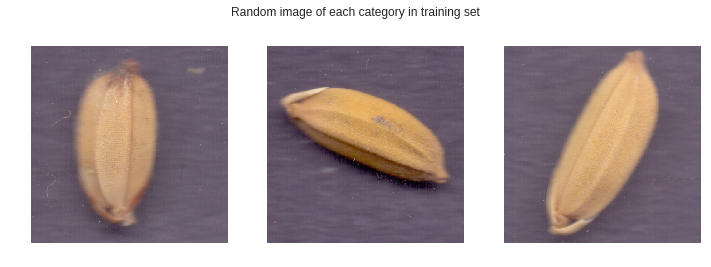

In [22]:
# Show four images of different categories from each of the three sets
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_train_imgs_path = [os.path.join(train_dir, cat, random.choice(os.listdir(os.path.join(train_dir, cat)))) for cat in os.listdir(train_dir)]
random_val_imgs_path = [os.path.join(validation_dir, cat, random.choice(os.listdir(os.path.join(validation_dir, cat)))) for cat in os.listdir(validation_dir)]
random_test_imgs_path = [os.path.join(test_dir, cat, random.choice(os.listdir(os.path.join(test_dir, cat)))) for cat in os.listdir(test_dir)]

# Parameters for graph; output images
nrows = 1
ncols = 3

# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
fig.suptitle('Random image of each category in training set')
for i, img_path in enumerate(random_train_imgs_path):
  # Set up subplot; subplot indices start at 1          
  ax = plt.subplot(nrows, ncols, i + 1)
  ax.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
fig.suptitle('Random image of each category in validation set')
for i, img_path in enumerate(random_val_imgs_path):
  # Set up subplot; subplot indices start at 1          
  ax = plt.subplot(nrows, ncols, i + 1)
  ax.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Set up matplotlib fig
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
fig.suptitle('Random image of each category in test_set')
for i, img_path in enumerate(random_test_imgs_path):
  # Set up subplot; subplot indices start at 1          
  ax = plt.subplot(nrows, ncols, i + 1)
  ax.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


## Data Preprocessing

This section forms the data input pipeline, first images are augmented first, then the images are prepared into batches and resized. 

Images are augmented to reduce overfitting and enlargen the small dataset.

The images are read from each categories (classes) directory in batches. 

### Data Augmentation

The images are rescaled and augmented. 

Augmentation is applied only to the actual training set.

Rescaling is applied to both training and validation sets.

#### Why Data Augmentation?

In order to make the most of training examples, "augment" images via a number of random transformations, so that at training time, model will never see the exact same picture twice. This helps prevent overfitting and helps the model generalize better.

#### Use ImageDataGenerator class for Augmentation and Rescaling

The ImageDataGenerator class allows to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). 

Augmentation can be done by configuring a number of random transformations to be performed on the images read by ImageDataGenerator instance.

With data augmentation in place, the training images are randomly transformed each time a new training epoch runs, which means that the model will never see the same image twice during training. This helps in preventing overfitting.

Augmentation is only applied to the training set

Process images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

#### Visualizing Image Augmentation

Apply the datagen transformations to a random image from the training set to produce five random variants of the same image.

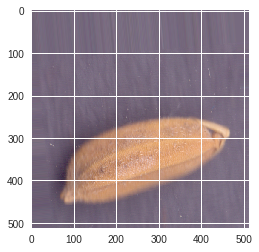

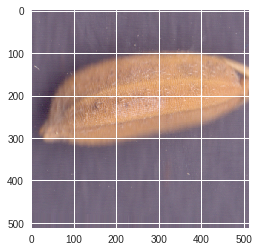

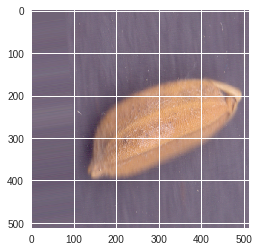

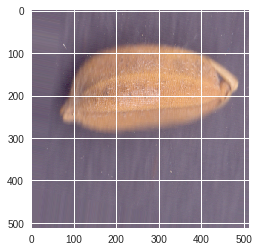

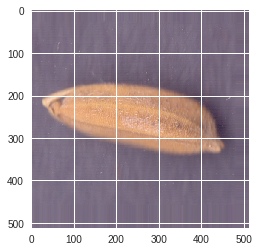

In [24]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path =  [os.path.join(train_dir, cat, random.choice(os.listdir(os.path.join(train_dir, cat)))) for cat in os.listdir(train_dir)][1]
img = load_img(img_path, target_size=(512, 512))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (512, 512, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 512, 512, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=5):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

### Image Generators

Set up data generators that will read pictures in source folders, convert them to float32 tensors, and feed them (with their labels) to the network. 

One generator for the training images and one for the validation images.

Generators will yield batches of images and their labels (binary).

These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [0]:
# define a few parameters for our image dataset
batch_size = 16
image_size = (512, 512)
image_dims = (512, 512, 3) # 3 dimensions rgb
no_classes = 5 # 5 image categories

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=image_size,  # All images will be resized
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, use categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using validation_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 3800 images belonging to 5 classes.
Found 950 images belonging to 5 classes.


## Build Image Classifier

Two models are built for training the dataset:
1. Small CovNet(3 Layers) Model 
2. Fine tuned pre trained InceptionV3 Model

### 1. Small CovNet from Scratch 

**Architecture**

* 3 {convolution + relu + maxpooling} modules.
* 2 {fully connected + fully connected} modules
* 1 {dropout} module
* 1 {softmax} module

Convolutions operate on 3x3 windows and maxpooling layers operate on 2x2 windows.

First convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.

#### Build Model

The model is built using the following layers:
* Conv2D - 2D Convolutional Network
* Activation - Relu
* Batch Normalization
* Max pooling
* Dense - Fully Connected Neural Network
* Softmax Layer as output 

**Key Issue in Building ML Models - Overfitting**

Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
  # the three color channels: R, G, and B
img_input = layers.Input(shape=image_dims)

# First convolution extracts 16 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 5, padding='same')(img_input)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
#x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 5, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(2)(x)

# 3rdconvolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(2)(x)

# 4th convolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# 5th convolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# 6th convolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# 5th convolution extracts 32 filters that are 3x3
# Batch normalization is applied before activation
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)

# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(192, 3,padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)


# Flatten feature map to a 1-dim tensor to add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
# Batch normalization is applied before activation
x = layers.Dense(192)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

# Add a dropout rate of 0.5 to prevent overfitting
x = layers.Dropout(0.55)(x)

# Create output layer using softmax activation
output = layers.Dense(no_classes, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + softmax output layer
simple_model = Model(img_input, output)

# Summarize the model
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 512, 512, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 16)      6416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 512, 512, 16)      0         
__________

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in simple_model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Prepare a random input image of each category/class from the training set.
random_images1 = [os.path.join(train_dir, cat, random.choice(os.listdir(os.path.join(train_dir, cat)))) for cat in os.listdir(train_dir)]
img_path = random.choice(np.array(random_images1).flatten())

img = load_img(img_path, target_size=(512, 512))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in simple_model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')

#### Compile Model

The model is compiled with training parameters set

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
from tensorflow.keras.optimizers import Adam

simple_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00002),
              metrics=['acc'])

#### Train Model

The model is trained by feeding the data from the image generators

In [0]:
import tensorflow as tf

config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)

In [33]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
simple_model_history = simple_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train_imgs // batch_size,  # total_train_images = batch_size * steps
      epochs=28,
      validation_data=validation_generator,
      validation_steps=total_val_imgs // batch_size,  # total_val_images = batch_size * steps
      verbose=2)

Epoch 1/28
 - 346s - loss: 0.3350 - acc: 0.8834 - val_loss: 0.2008 - val_acc: 0.9269
Epoch 2/28
 - 343s - loss: 0.3158 - acc: 0.8853 - val_loss: 0.4171 - val_acc: 0.8464
Epoch 3/28
 - 343s - loss: 0.3140 - acc: 0.8877 - val_loss: 0.1895 - val_acc: 0.9322
Epoch 4/28
 - 343s - loss: 0.3042 - acc: 0.8921 - val_loss: 0.3886 - val_acc: 0.8633
Epoch 5/28
 - 341s - loss: 0.2892 - acc: 0.8924 - val_loss: 0.4888 - val_acc: 0.8273
Epoch 6/28
 - 342s - loss: 0.3122 - acc: 0.8863 - val_loss: 0.2775 - val_acc: 0.9004
Epoch 7/28
 - 334s - loss: 0.2856 - acc: 0.9027 - val_loss: 0.7995 - val_acc: 0.7447
Epoch 8/28
 - 337s - loss: 0.2666 - acc: 0.9032 - val_loss: 0.5731 - val_acc: 0.7754
Epoch 9/28
 - 339s - loss: 0.2806 - acc: 0.9008 - val_loss: 0.2049 - val_acc: 0.9280
Epoch 10/28
 - 338s - loss: 0.2735 - acc: 0.8977 - val_loss: 0.3725 - val_acc: 0.8612
Epoch 11/28
 - 336s - loss: 0.2470 - acc: 0.9085 - val_loss: 0.1963 - val_acc: 0.9301
Epoch 12/28
 - 337s - loss: 0.2611 - acc: 0.9077 - val_loss: 0.

### 2. Using a Pre-trained Model (a.k.a Transfer Learning)

**Feature Extraction**

_General Idea_
1. Take a model trained on a very large dataset, run it on smaller dataset, and extract the intermediate representations (features) that the model generates. These representations are frequently informative for the computer vision task at hand, even though the task may be quite different from the problem that the original model was trained on. 

2. Use the Inception V3 model developed at Google, and pre-trained on ImageNet, a large dataset of web images (1.4M images and 1000 classes).

3. Use the output of the very last layer before the Flatten operation, the so-called "bottleneck layer." for Feature Extraction. The fully connected layers will be too specialized for the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottleneck features, retain much generality.

#### Setting up InceptionV3

instantiate an Inception V3 model preloaded with weights trained on ImageNet

By specifying the include_top=False argument, load a network that doesn't include the classification layers at the top—ideal for feature extraction.

Make the model non-trainable, since we will only use it for feature extraction; we won't update the weights of the pretrained model during training.

Use mixed7 layer from InceptionV3 as last layer.

In [8]:
# Download weights for inceptionv3
local_weights_file = './inception_v3_weights.h5'
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O $local_weights_file

--2018-07-30 01:13:44--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./inception_v3_weights.h5’

./inception_v3_weig 100%[===================>]  83.84M   157MB/s    in 0.5s    

2018-07-30 01:13:44 (157 MB/s) - ‘./inception_v3_weights.h5’ saved [87910968/87910968]



In [0]:
# load weights file into inception v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# the model is initialized, the top layer isn't included
pre_trained_model = InceptionV3(
    input_shape=image_dims, include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
# make all layers not trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

In [55]:
last_layer = pre_trained_model.get_layer('mixed7')
print ('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 30, 30, 768)


#### Modify InceptionV3

Add one fully connected layer on top of inceptionV3 

In [0]:
# Flatten the output layer to 1 dimension
xx = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
xx = layers.Dense(1024)(xx)
xx = layers.BatchNormalization()(xx)
xx = layers.Activation('relu')(xx)
# Add a dropout rate of 0.2
xx = layers.Dropout(0.2)(xx)
# Add a final softmax layer for multi-class classification
xx = layers.Dense(no_of_classes, activation='softmax')(xx)
transfer_model = Model(pre_trained_model.input, xx)
transfer_model.summary()

#### Compile Model

In [0]:
# Configure and compile the model
transfer_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.00003),
              metrics=['acc'])

#### Train Model

Train the model with given no of epochs

In [0]:
transfer_model_history = transfer_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train_imgs // batch_size,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=total_val_imgs // batch_size,
      verbose=2)

#### Fine Tune Pre-trained Model

Retrain the last few layers of InceptionV3 to get better accuracy.

**Further Improving Accuracy with Fine-Tuning**

The weights of the pretrained network were not updated during training.
Increase performance by "fine-tuning" the weights of the top layers of the pretrained model alongside the training of the top-level classifier. 

A couple of important notes on fine-tuning:

1. Fine-tuning should only be attempted after the training the top-level classifier with the pretrained model set to non-trainable. By Adding a randomly initialized classifier on top of a pretrained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier), and the pretrained model will forget everything it has learned.
2. Fine-tune only the top layers of the pre-trained model rather than all layers of the pretrained model because, in a convnet, the higher up a layer is, the more specialized it is. 

3. The first few layers in a convnet learn very simple and generic features, which generalize to almost all types of images. The features higher up are increasingly specific to the dataset that the model is trained on. The goal of fine-tuning is to adapt these specialized features to work with the new dataset.

_Set the top layers of Inception V3 to be trainable, recompile the model, and resume training.
Unfreeze all layers belonging to the mixed7 module—i.e., all layers found after mixed6—and recompile the model._

In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
    if unfreeze:
        layer.trainable = True
    if layer.name == 'mixed6':
        unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
transfer_model.compile(loss='categorical_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.8),
              metrics=['acc'])

In [0]:
transfer_model_history_with_ft = transfer_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train_imgs // batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=total_val_imgs // batch_size,
      verbose=2)

## Visualize Model Layers

To see what kind of features the convnet has learned, visualize how an input gets transformed as it goes through the convnet.

Pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map.

Rerun this cell to generate intermediate representations for a variety of training images.

Using simple model for visualization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


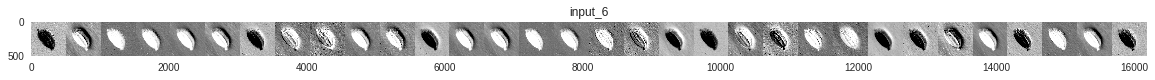

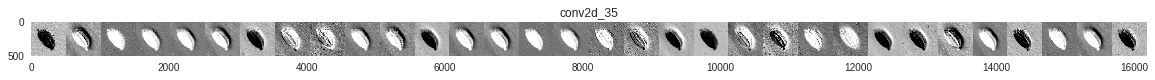

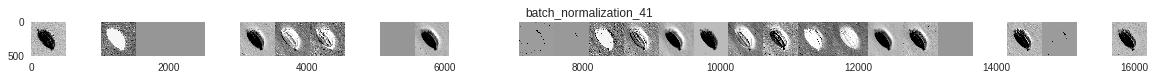

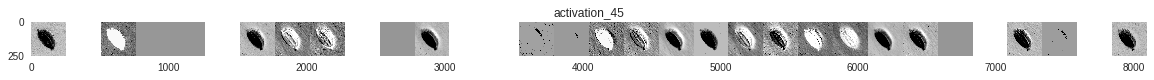

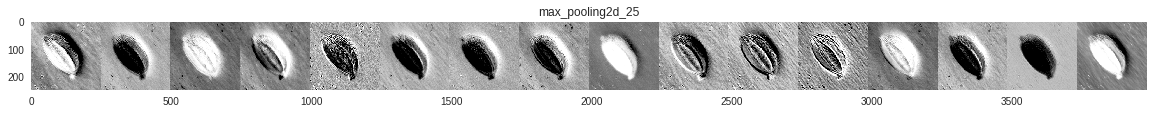

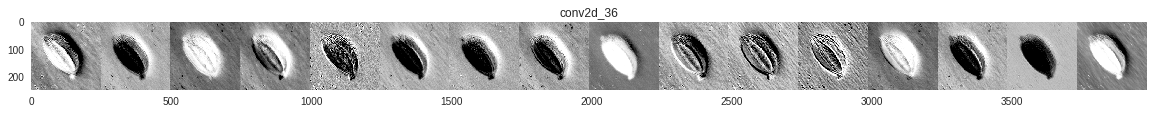

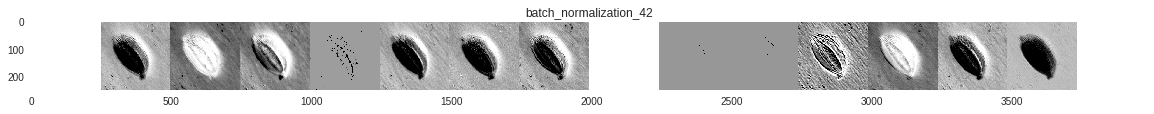

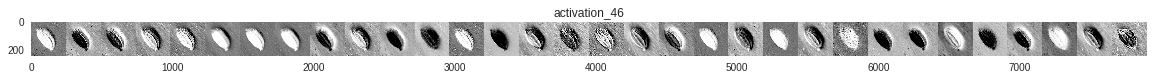

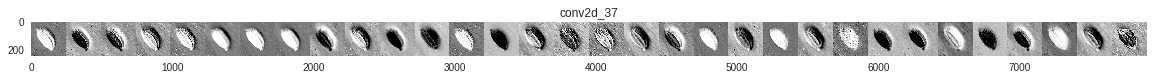

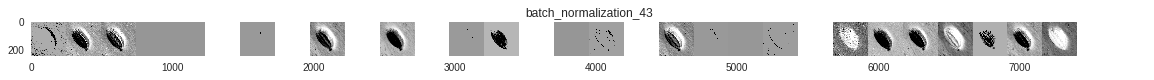

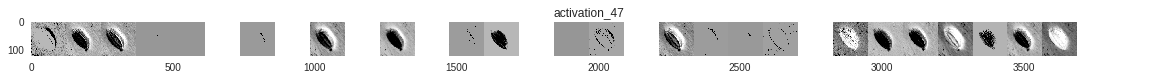

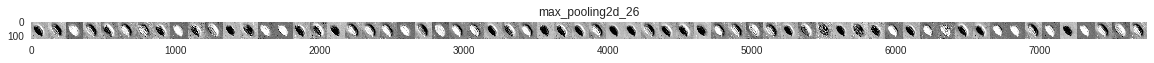

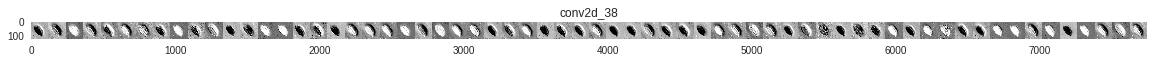

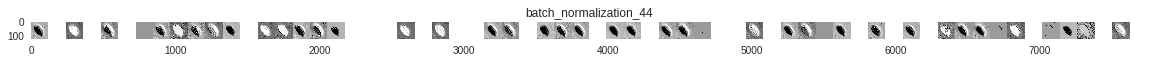

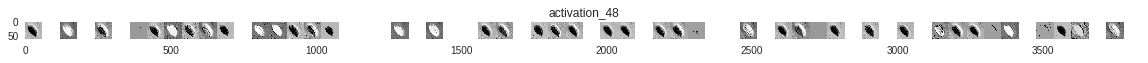

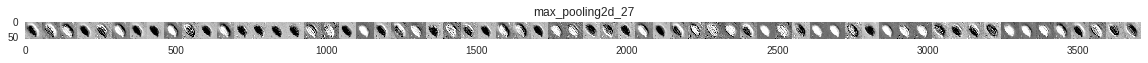

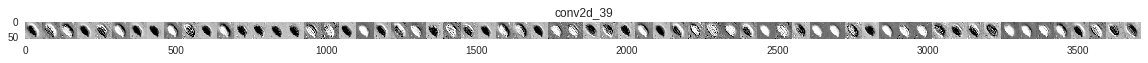

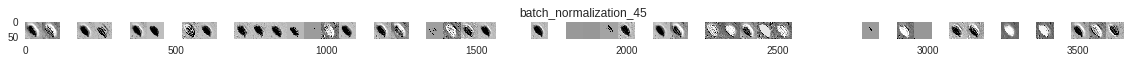

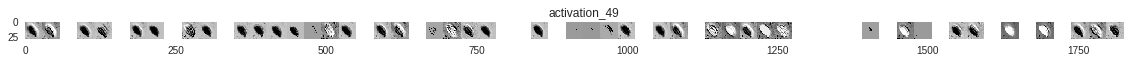

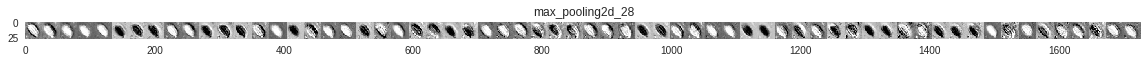

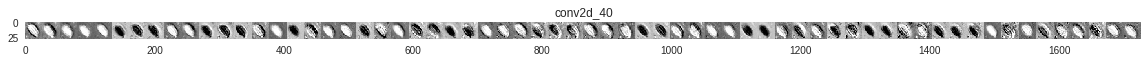

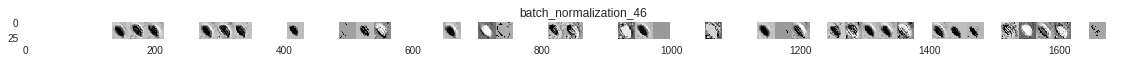

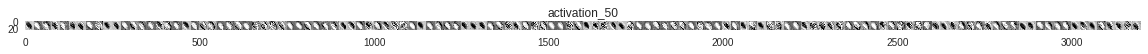

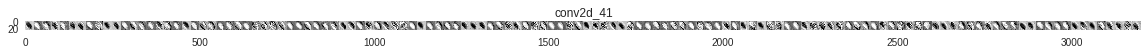

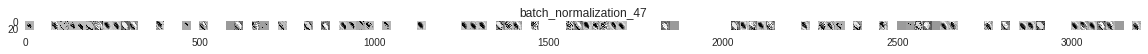

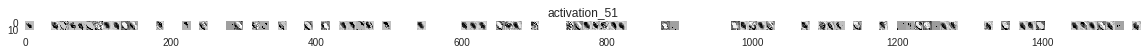

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in simple_model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Prepare a random input image of each category/class from the training set.
random_images1 = [os.path.join(train_dir, cat, random.choice(os.listdir(os.path.join(train_dir, cat)))) for cat in os.listdir(train_dir)]
img_path = random.choice(np.array(random_images1).flatten())

img = load_img(img_path, target_size=(512, 512))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in simple_model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')

The images go from the raw pixels to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. 

This is referred to as "sparsity."

Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image.

A convnet can be thought of (or a deep network in general) as an information distillation pipeline.

## Evaluate Training

Plot train and validation losses across epochs.

#### Model Evaluation Function

Function to compute training and validation accuracy + loss

In [0]:
def evaluate_model(history):
    # Retrieve a list of accuracy results on training and validation data
    # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    # Retrieve a list of loss results on training and validation data
    # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))
    
    ncols = 2
    nrows = 1
    # Set up matplotlib fig
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    eval_metrics = [(acc, val_acc), (loss, val_loss)]
    tmp = ['accuracy', 'loss']
    for i in range(2):
      # Set up subplot; subplot indices start at 1          
      ax = plt.subplot(nrows, ncols, i + 1)
      # Plot training and validation accuracy per epoch
      plt.plot(epochs, eval_metrics[i][0])
      plt.plot(epochs, eval_metrics[i][1])
      plt.title('Training and validation %s per epoch' % tmp[i])
      plt.legend(['Training ' + tmp[i], 'Validation ' + tmp[i]])
    plt.show()

#### Running Evaluation Tests

Run these tests on:
* Simple Model
* Transfer Model with Fine Tuning

In [36]:
print('Training and validation accuracy + loss for Simple Model')
_=evaluate_model(simple_model_history)
#print('\nTraining and validation accuracy + loss for Transfer Model with Fine Tuning')
_#=evaluate_model(transfer_model_history_with_ft)

## Test Models

Finally test the model on the test set to get accuracy results.

### Test Functions

Calcuation and plotting functions for accuracy, confusion matrix and roc curves.

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [0]:
from scipy import interp
from sklearn.metrics import roc_curve, auc
## ROC (Receiver Operating Characteristic)
## ROC Curve for Multiclass Classification:
  ## ROC curves are typically used in binary classification to study the output of a classifier.
  ## In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output.
  ## One ROC curve can be drawn per label, or draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).
  ## Another evaluation measure for multi-class classification is macro-averaging, which gives equal weight to the classification of each label.
def plot_roc_curve(n_classes, y_true, y_pred):  
  lw = 2
  # Compute ROC curve and ROC area for each class
  fpr = dict()  
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
           label='micro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["micro"]),
           color='red', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
           label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
           color='green', linestyle=':', linewidth=4)

  colors = itertools.cycle(['black', 'blue', 'yellow', 'brown'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
               label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           y_pred,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true & y_pred into their class numbers
    if not binary:
        y_true_classes = np.argmax(y_true,axis=1)
        y_pred_classes = np.argmax(y_pred,axis=1)
    
    # 2. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true_classes,y_pred_classes)))
    
    print("")
    
    # 3. Print classification report
    print("Classification Report")
    print(classification_report(y_true_classes,y_pred_classes,digits=5))    
    
    # 4. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true_classes,y_pred_classes)
    plot_confusion_matrix(cnf_matrix,classes=classes)
    
    # 5. Plot ROC Curve
    plot_roc_curve(len(classes), y_true, y_pred)

### Run Tests on Models

Show accuracy, confusion matrix and roc curve for each model

In [0]:
# function used to convert test images
from tensorflow.python.keras.preprocessing import image
def convert_image(img_path):
    # dimensions of our images
    img = image.load_img(img_path, target_size=image_size)
    img_tensor = image.img_to_array(img) # (height, width, channels)
    # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255 # imshow expects values in the range [0, 1]
    return img_tensor

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def test_model(model):
  # predict classes for each image of every category in the test set
  classes = train_generator.class_indices
  actual_results={}
  test_results={}

  for img_cat in os.listdir(test_dir):
      test_images_path = os.path.join(test_dir, img_cat)
      actual_results[img_cat] = []
      test_results[img_cat] = []
      for img in os.listdir(test_images_path):
          actual_results[img_cat].append(img_cat)
          img_path = os.path.join(test_images_path, img)
          new_image = convert_image(img_path)
          # check predictions   
          class_predictions = model.predict(new_image)
          most_likely_class_index = np.argmax(class_predictions,axis=1)
          predicted_class = list(classes.keys())[list(classes.values()).index(most_likely_class_index)]
          test_results[img_cat].append(predicted_class)

  for cat in test_results:
      n_images = len(test_results[cat])
      true = 0
      for predicted_cat in test_results[cat]:
          if predicted_cat == cat:
              true +=1
      acc = round(true / n_images, 2)                            
      print('The %% accuracy for %s is %0.2f' % (cat, 100*acc))
  
  
  label_encoder = LabelEncoder()
  onehot_encoder = OneHotEncoder(sparse=False)
  
  y_pred = np.array(list(test_results.values()))
  
  # integer encode
  integer_encoded = label_encoder.fit_transform(y_pred.flatten())
  
  # binary encode
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  
  y_pred = onehot_encoded

  y_true = np.array(list(actual_results.values()))
  
  #integer encode
  integer_encoded = label_encoder.fit_transform(y_true.flatten())

  # binary encode
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  
  y_true = onehot_encoded
  
  full_multiclass_report(model, y_pred, y_true, list(classes.keys()))

Testing Simple Model
The % accuracy for mushkbudji is 87.00
The % accuracy for sr-2 is 100.00
The % accuracy for sr-1 is 93.00
The % accuracy for sr-4 is 90.00
The % accuracy for jehlum is 100.00
Accuracy : 0.94

Classification Report
             precision    recall  f1-score   support

          0    1.00000   1.00000   1.00000        30
          1    1.00000   0.86667   0.92857        30
          2    0.93333   0.93333   0.93333        30
          3    0.90909   1.00000   0.95238        30
          4    0.87097   0.90000   0.88525        30

avg / total    0.94268   0.94000   0.93991       150



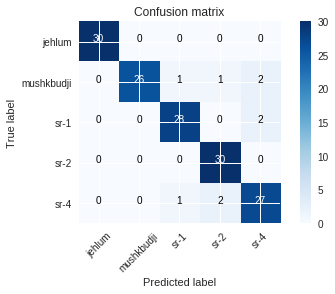

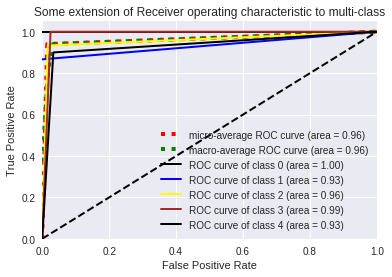


-----------------------



In [42]:
print('Testing Simple Model')
test_model(simple_model)
print('\n-----------------------\n')
#print('\nTesting Transfer Model')
#test_model(transfer_model)

## Predict Images

Now the model can be used to predict new images for these categories.

In [0]:
import uuid
# some test images
def predict_image(link):
    classes = train_generator.class_indices
    filename = str(uuid.uuid4()) # generate unique name
    save_path = filename
    !wget -q $link -O $save_path
    img = convert_image(save_path)
    class_predictions = transfer_model.predict(img)
    most_likely_class_index = np.argmax(class_predictions,axis=1)
    predicted_class = list(classes.keys())[list(classes.values()).index(most_likely_class_index)]
    print(predicted_class)

In [5]:
'''img_link = "http://museum.wa.gov.au/sites/default/files/imagecache/wam_v2_article_full_nocrop/blogs/F3017%20-%201.jpg" #@param {type:"string"}
predict_image(img_link)'''

'img_link = "http://museum.wa.gov.au/sites/default/files/imagecache/wam_v2_article_full_nocrop/blogs/F3017%20-%201.jpg" #@param {type:"string"}\npredict_image(img_link)'

## Save Model

Save the model in google drive

In [0]:
# function for saving the model
def save_model(model_obj, model_path):
    if not os.path.exists('./Models'):
        os.mkdir('./Models')
    model_obj.save(model_path)

In [0]:
# function for uploading model to google drive
# the model is uploaded as a txt file because there is no support for .h5 mime type
# to load the model back just change the extension to .h5 before loading via keras.models.load_model()
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
def upload_model_to_drive(model_name, model_path):
    auth.authenticate_user()
    drive_service = build('drive', 'v3')
    file_metadata = {
    'name': model_name,
    'mimeType': 'text/plain'
    }
    media = MediaFileUpload(model_path, 
                          mimetype='text/plain',
                          resumable=True)
    created = drive_service.files().create(body=file_metadata,
                                         media_body=media,
                                         fields='id').execute()
    print('File Uploaded to gDrive with File ID: {}'.format(created.get('id')))


In [51]:
save_model(simple_model, './Models/seed_classififcation_with_5_seeds.h5')
#save_model(transfer_model, './Models/kashir_cheez_transfer_model.h5')
upload_model_to_drive('seed_classififcation.h5','./Models/seed_classififcation_with_5_seeds.h5' )
#upload_model_to_drive('seed_classififcation.h5','./Models/seed_classififcation_with_5_seeds.h5' )

File Uploaded to gDrive with File ID: 10y70cg2kfnufyj82KYqCpKAH_RSr6h3p
